In [1]:
from subprocess import check_output
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

warnings.filterwarnings('ignore')
num_classes = 10
epochs = 20

train_df = pd.read_csv('./input/fashion-mnist_train.csv', sep=',')
test_df = pd.read_csv('./input/fashion-mnist_test.csv', sep = ',')

print(check_output(["ls", "./input"]).decode("utf8"))

print(train_df.head())
print(train_df.shape)

fashion-mnist_test.csv
fashion-mnist_train.csv
t10k-images-idx3-ubyte
t10k-labels-idx1-ubyte
train-images-idx3-ubyte
train-labels-idx1-ubyte

   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      2       0       0       0       0       0       0       0       0   
1      9       0       0       0       0       0       0       0       0   
2      6       0       0       0       0       0       0       0       5   
3      0       0       0       0       1       2       0       0       0   
4      3       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0        30        43         0   
3       0  ...         3         0         0         0         0         1   
4       0  

In [3]:
test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


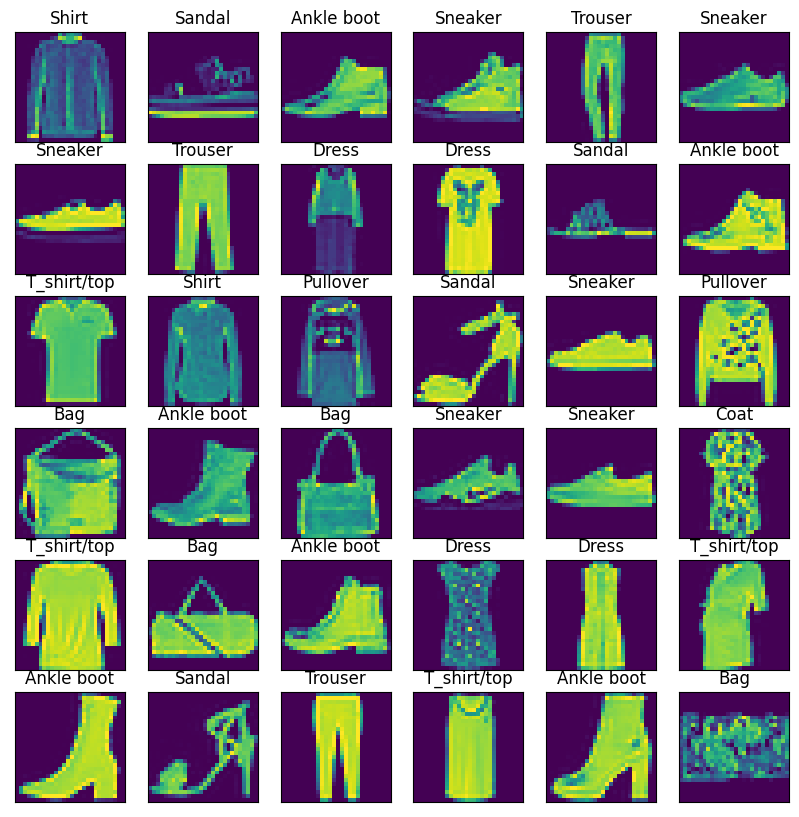

In [2]:
train_np = np.array(train_df, dtype = 'float32')
test_np = np.array(test_df, dtype='float32')

# Since the image data in x_train and x_test is from 0 to 255 ,  we need to rescale this from 0 to 1.To do this we need to divide the x_train and x_test by 255 . It's important that the training set and the testing set be preprocessed in the same way:
x_train = train_np[:,1:]/255
y_train = train_np[:,0]
x_test = test_np[:,1:]/255
y_test = test_np[:,0]

x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = 0.2, random_state = 12345)

class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10, 10))
for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i].reshape((28,28)))
    label_index = int(y_train[i])
    plt.title(class_names[label_index])
plt.show()

In [3]:
image_rows = 28
image_cols = 28
batch_size = 4096
# the shape of the image as 3d with rows and columns grey scale
image_shape = (image_rows, image_cols, 1)

x_train = x_train.reshape(x_train.shape[0], *image_shape)
x_test = x_test.reshape(x_test.shape[0], *image_shape)
x_validate = x_validate.reshape(x_validate.shape[0], *image_shape)

x_validate

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [25]:
from sklearn.metrics import classification_report
import tensorflow as tf

# , 'pool_size': 2 # down sampling the output instead of 28*28 it is 14*14
params = [
    # # -0.01
    # {     'filters': 32
    #     , 'kernel_size': 3
    #     , 'pool_size': 2
    #     , 'dropout': 0.2
    #     , 'dense_units': 32
    #     , 'adam_lr': 0.0005
    #     , 'batch_size': 4096
    #     , 'epochs': 75},
    # + 0.12

    {   'model': Sequential([
            Conv2D(filters=16, kernel_size=4, activation='relu', input_shape = image_shape),
            Dropout(0.2),
            MaxPooling2D(pool_size=2),
            Dropout(0.2), Flatten(),
            Dense(16, activation='relu'),
            Dense(10, activation = 'softmax')])
        , 'adam_lr': 0.0025
        , 'batch_size': 64
        , 'epochs': 30},

    # {   'model': Sequential([
    #         Conv2D(filters=16, kernel_size=4, activation='relu', input_shape = image_shape),
    #         Dropout(0.2),
    #         MaxPooling2D(pool_size=2),
    #         Dropout(0.2), Flatten(),
    #         Dense(16, activation='relu'),
    #         Dense(10, activation = 'softmax')])
    #     , 'adam_lr': 0.0025
    #     , 'batch_size': 128
    #     , 'epochs': 30},


    # {   'model': Sequential([
    #         Conv2D(filters=16, kernel_size=4, activation='relu', input_shape = image_shape),
    #         Dropout(0.2),
    #         MaxPooling2D(pool_size=2),
    #         Dropout(0.2), Flatten(),
    #         Dense(32, activation='relu'),
    #         Dense(10, activation = 'softmax')])
    #     , 'adam_lr': 0.0025
    #     , 'batch_size': 1024
    #     , 'epochs': 30},

    # {   'model': Sequential([
    #         Conv2D(filters=16, kernel_size=4, activation='relu', input_shape = image_shape),
    #         MaxPooling2D(pool_size=2), Dropout(0.2), Flatten(),
    #         Dense(32, activation='relu'),
    #         Dense(10, activation = 'softmax')])
    #     , 'adam_lr': 0.0025
    #     , 'batch_size': 1024
    #     , 'epochs': 30},

    # {     'filters': 32
    #     , 'kernel_size': 4
    #     , 'pool_size': 2
    #     , 'dropout': 0.2
    #     , 'dense_units': 32
    #     , 'adam_lr': 0.0025
    #     , 'batch_size': 1024
    #     , 'epochs': 30},

    # {     'filters': 32
    #     , 'kernel_size': 3
    #     , 'pool_size': 2
    #     , 'dropout': 0.2
    #     , 'dense_units': 32
    #     , 'adam_lr': 0.0025
    #     , 'batch_size': 1024
    #     , 'epochs': 30},
    #
    # {     'filters': 32
    #     , 'kernel_size': 3
    #     , 'pool_size': 2
    #     , 'dropout': 0.2
    #     , 'dense_units': 32
    #     , 'adam_lr': 0.0025
    #     , 'batch_size': 2048
    #     , 'epochs': 30},

    # -.01
    # {     'filters': 32
    #     , 'kernel_size': 3
    #     , 'pool_size': 2
    #     , 'dropout': 0.2
    #     , 'dense_units': 32
    #     , 'adam_lr': 0.0025
    #     , 'batch_size': 4096
    #     , 'epochs': 30},

    # -.01
    # {     'filters': 32
    #     , 'kernel_size': 3
    #     , 'pool_size': 2
    #     , 'dropout': 0.2
    #     , 'dense_units': 32
    #     , 'adam_lr': 0.002
    #     , 'batch_size': 4096
    #     , 'epochs': 30},
    # -.01
    # {     'filters': 32
    #     , 'kernel_size': 3
    #     , 'pool_size': 2
    #     , 'dropout': 0.2
    #     , 'dense_units': 24
    #     , 'adam_lr': 0.001
    #     , 'batch_size': 4096
    #     , 'epochs': 35},
    # {     'filters': 32
    #     , 'kernel_size': 3
    #     , 'pool_size': 2
    #     , 'dropout': 0.2
    #     , 'dense_units': 32
    #     , 'adam_lr': 0.001
    #     , 'batch_size': 4096
    #     , 'epochs': 35},
]

for p in params:
    print('>>> Params: ', p)
    cnn_model = p['model']
    cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(lr=p['adam_lr']), metrics =['accuracy'])
    history = cnn_model.fit(
        x_train,
        y_train,
        batch_size=p['batch_size'],
        epochs=p['epochs'],
        verbose=0,
        validation_data=(x_validate, y_validate),
    )
    score = cnn_model.evaluate(x_test, y_test, verbose=0)
    print('===========================')
    print('>>>> Test Loss : {:.4f}'.format(score[0]))
    print('>>>> Test Accuracy : {:.4f}'.format(score[1]))
    print('===========================\n\n')
    cnn_model.reset_states()
    del cnn_model

>>> Params:  {'model': <keras.engine.sequential.Sequential object at 0x3f97d85b0>, 'adam_lr': 0.0025, 'batch_size': 64, 'epochs': 30}


2023-02-22 16:45:16.285451: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-22 16:45:21.766472: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


>>>> Test Loss : 0.2555
>>>> Test Accuracy : 0.9085


>>> Params:  {'model': <keras.engine.sequential.Sequential object at 0x46e56ec80>, 'adam_lr': 0.0025, 'batch_size': 128, 'epochs': 30}


2023-02-22 16:48:21.537224: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-22 16:48:25.935315: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


>>>> Test Loss : 0.2714
>>>> Test Accuracy : 0.9071




>>> Params:  {'model': <keras.engine.sequential.Sequential object at 0x28220d780>, 'adam_lr': 0.0025, 'batch_size': 64, 'epochs': 100}


2023-02-22 17:11:06.112921: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-22 17:11:12.567680: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-22 17:23:30.917865: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


>>>> Test Loss : 0.2930
>>>> Test Accuracy : 0.9033


 24/313 [=>............................] - ETA: 1s

2023-02-22 17:23:33.306268: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

 T_shirt/top       0.87      0.81      0.84      1000
     Trouser       0.98      0.99      0.98      1000
    Pullover       0.87      0.82      0.85      1000
       Dress       0.92      0.90      0.91      1000
        Coat       0.89      0.84      0.87      1000
      Sandal       0.99      0.96      0.97      1000
       Shirt       0.67      0.81      0.73      1000
     Sneaker       0.93      0.97      0.95      1000
         Bag       0.98      0.97      0.98      1000
  Ankle boot       0.97      0.96      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.91      0.90      0.90     10000
weighted avg       0.91      0.90      0.90     10000



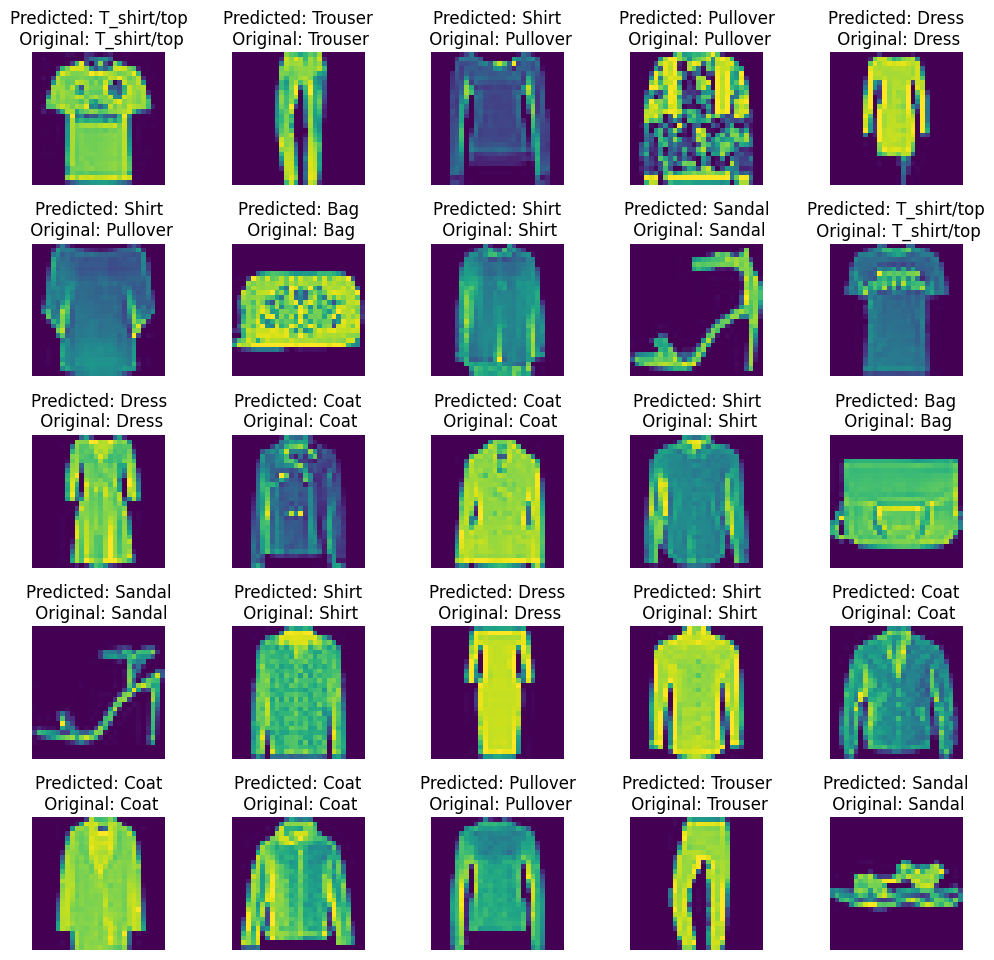

In [27]:
params = [
    # # -0.01
    # {     'filters': 32
    #     , 'kernel_size': 3
    #     , 'pool_size': 2
    #     , 'dropout': 0.2
    #     , 'dense_units': 32
    #     , 'adam_lr': 0.0005
    #     , 'batch_size': 4096
    #     , 'epochs': 75},
    # + 0.12

    {   'model': Sequential([
        Conv2D(filters=16, kernel_size=4, activation='relu', input_shape = image_shape),
        Dropout(0.2),
        MaxPooling2D(pool_size=2),
        Dropout(0.2), Flatten(),
        Dense(16, activation='relu'),
        Dense(10, activation = 'softmax')])
        , 'adam_lr': 0.0025
        , 'batch_size': 64
        , 'epochs': 100},
]
p = params[0]

print('>>> Params: ', p)
cnn_model = p['model']
cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(lr=p['adam_lr']), metrics =['accuracy'])
history = cnn_model.fit(
    x_train,
    y_train,
    batch_size=p['batch_size'],
    epochs=p['epochs'],
    verbose=0,
    validation_data=(x_validate, y_validate),
)
score = cnn_model.evaluate(x_test, y_test, verbose=0)
print('===========================')
print('>>>> Test Loss : {:.4f}'.format(score[0]))
print('>>>> Test Accuracy : {:.4f}'.format(score[1]))
print('===========================\n\n')

predicted_classes = np.argmax(cnn_model.predict(x_test), axis=-1)
y_test = test_df.iloc[:, 0]
print(classification_report(y_test, predicted_classes, target_names=class_names))

L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L * W):  
    axes[i].imshow(x_test[i].reshape(28,28))
    # axes[i].set_title(f"Prediction Class = {predicted_classes[i]:0.1f}\n Original Class = {y_test[i]:0.1f}")
    axes[i].set_title(f"Predicted: {class_names[predicted_classes[i]]}\n Original: {class_names[y_test[i]]}")
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)